# Import Libraries

In [19]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Load Dataset

In [20]:
df=pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Data Cleaning

In [21]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
len(df)

16598

In [24]:
#Handling Missing Values

df.fillna({'Year':df['Year'].median()},inplace=True)
df.dropna(subset='Publisher',inplace=True)


In [25]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [26]:
# Datatype of Each features

for col in df.columns:
    print(f'Datatype of {col} is {df[col].dtype}')

Datatype of Rank is int64
Datatype of Name is object
Datatype of Platform is object
Datatype of Year is float64
Datatype of Genre is object
Datatype of Publisher is object
Datatype of NA_Sales is float64
Datatype of EU_Sales is float64
Datatype of JP_Sales is float64
Datatype of Other_Sales is float64
Datatype of Global_Sales is float64


In [27]:
# Data type convertion

df['Year']=pd.to_datetime(df['Year'],format='%Y',errors='coerce').dt.year

# Exploratory Data Analysis (EDA)

In [28]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000
mean,8294.197642,2006.414510,0.265079,0.146883,0.077998,0.048191,0.538426
std,4790.703200,5.788794,0.817929,0.506129,0.309800,0.188879,1.557424
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4143.750000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12440.250000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Distribution Analysis

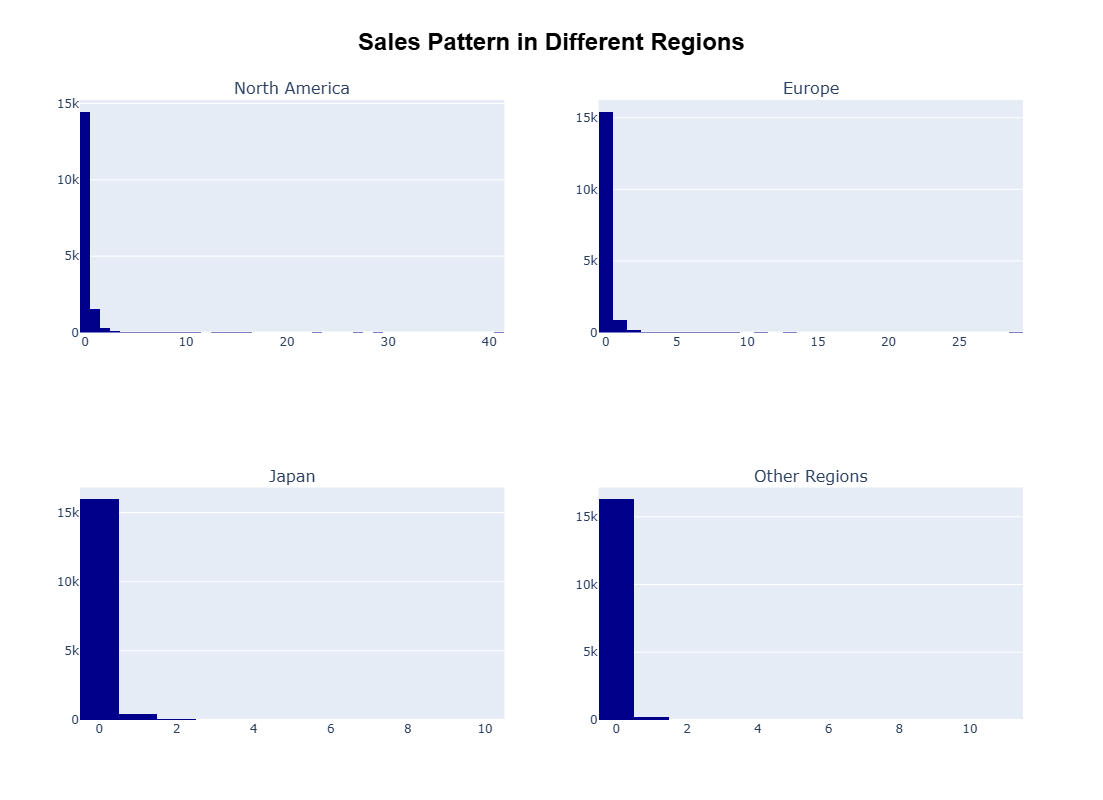

In [29]:
# Create individual charts using Plotly Express
na_hist=px.histogram(df,x='NA_Sales',nbins=50,color_discrete_sequence=['darkblue'])
eu_hist=px.histogram(df,x='EU_Sales',nbins=50,color_discrete_sequence=['darkblue'])
jp_hist=px.histogram(df,x='JP_Sales',nbins=50,color_discrete_sequence=['darkblue'])
or_hist=px.histogram(df,x='Other_Sales',nbins=50,color_discrete_sequence=['darkblue'])
# Create a subplot layout
fig = make_subplots(
    rows=2, cols=2, 
    subplot_titles=("North America", "Europe", "Japan", "Other Regions")
)

# Add Plotly Express charts to the subplot
fig.add_trace(na_hist.data[0], row=1, col=1)  
fig.add_trace(eu_hist.data[0], row=1, col=2)     
fig.add_trace(jp_hist.data[0], row=2, col=1)     
fig.add_trace(or_hist.data[0], row=2, col=2)      

# Update layout
fig.update_layout(height=800, width=1100, title_text="Sales Pattern in Different Regions",title_x=0.5,
                 title_font=dict(family="Arial, sans-serif",size=24,weight='bold',color='black'))

# Show the visualization
fig.show()



In [30]:
# Create individual charts using Plotly Express
na_box=px.box(df,y='NA_Sales',color_discrete_sequence=['darkblue'])
eu_box=px.box(df,y='EU_Sales',color_discrete_sequence=['darkblue'])
jp_box=px.box(df,y='JP_Sales',color_discrete_sequence=['darkblue'])
or_box=px.box(df,y='Other_Sales',color_discrete_sequence=['darkblue'])
# Create a subplot layout
fig = make_subplots(
    rows=2, cols=2, 
    subplot_titles=("North America", "Europe", "Japan", "Other Regions")
)

# Add Plotly Express charts to the subplot
fig.add_trace(na_box.data[0], row=1, col=1)  
fig.add_trace(eu_box.data[0], row=1, col=2)     
fig.add_trace(jp_box.data[0], row=2, col=1)     
fig.add_trace(or_box.data[0], row=2, col=2)      

# Update layout
fig.update_layout(height=800, width=1100, title_text="IQR and Variation Analysis of Sales Distribution Each Region",
                  title_x=0.5,title_font=dict(family="Arial, sans-serif",size=24,weight='bold',color='black'))

# Show the visualization
fig.show()


# Data Insights

# Trend of Game Sales

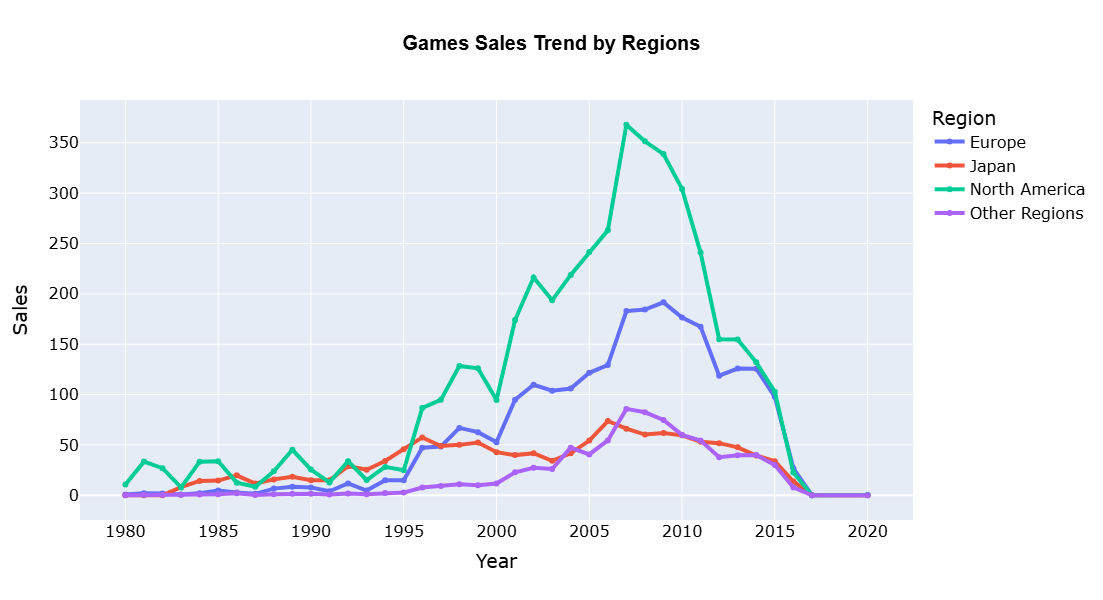

In [31]:
# Melt down table into long format

melted_df = pd.melt(df, id_vars=['Year'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                    var_name='Region', value_name='Sales')

#Aggregate the dataframe
aggregated_df = melted_df.groupby(['Year', 'Region'])['Sales'].sum().reset_index()
aggregated_df['Region']=aggregated_df['Region'].replace({'NA_Sales':'North America','EU_Sales':'Europe',
                                                        'JP_Sales':'Japan','Other_Sales':'Other Regions'})

# Line chart
fig=px.line(aggregated_df,x='Year',y='Sales',color='Region',title='Games Sales Trend by Regions',
            markers=True,height=600)
fig.update_layout(title_x=0.5,title_font=dict(family="Arial, sans-serif",size=20,weight='bold',color='black'),
                 font=dict(family='Verdana', size=16, color='black'))
fig.update_traces(line=dict(width=4))
fig.show()

# TOP 10 Games

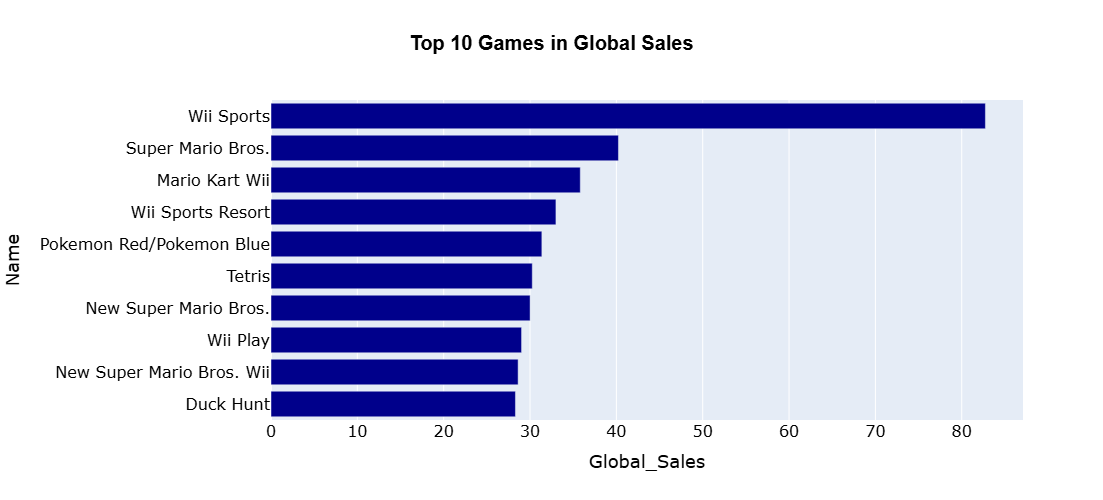

In [32]:
# Top Global sales dataframe
top_df=df.nlargest(10,'Global_Sales').sort_values('Global_Sales')

# Bar chart
fig=px.bar(top_df,x='Global_Sales',y='Name',orientation='h',title='Top 10 Games in Global Sales',
           color_discrete_sequence=['darkblue'],height=500)
fig.update_layout(title_x=0.5,title_font=dict(family="Arial, sans-serif",size=20,weight='bold',color='black'),
                 xaxis_title_font=dict(family='Verdana', size=18, color='black'),
                 yaxis_title_font=dict(family='Verdana', size=18, color='black'),
                 font=dict(family='Verdana', size=16, color='black'))
fig.show()


# TOP 10 Games by Regions

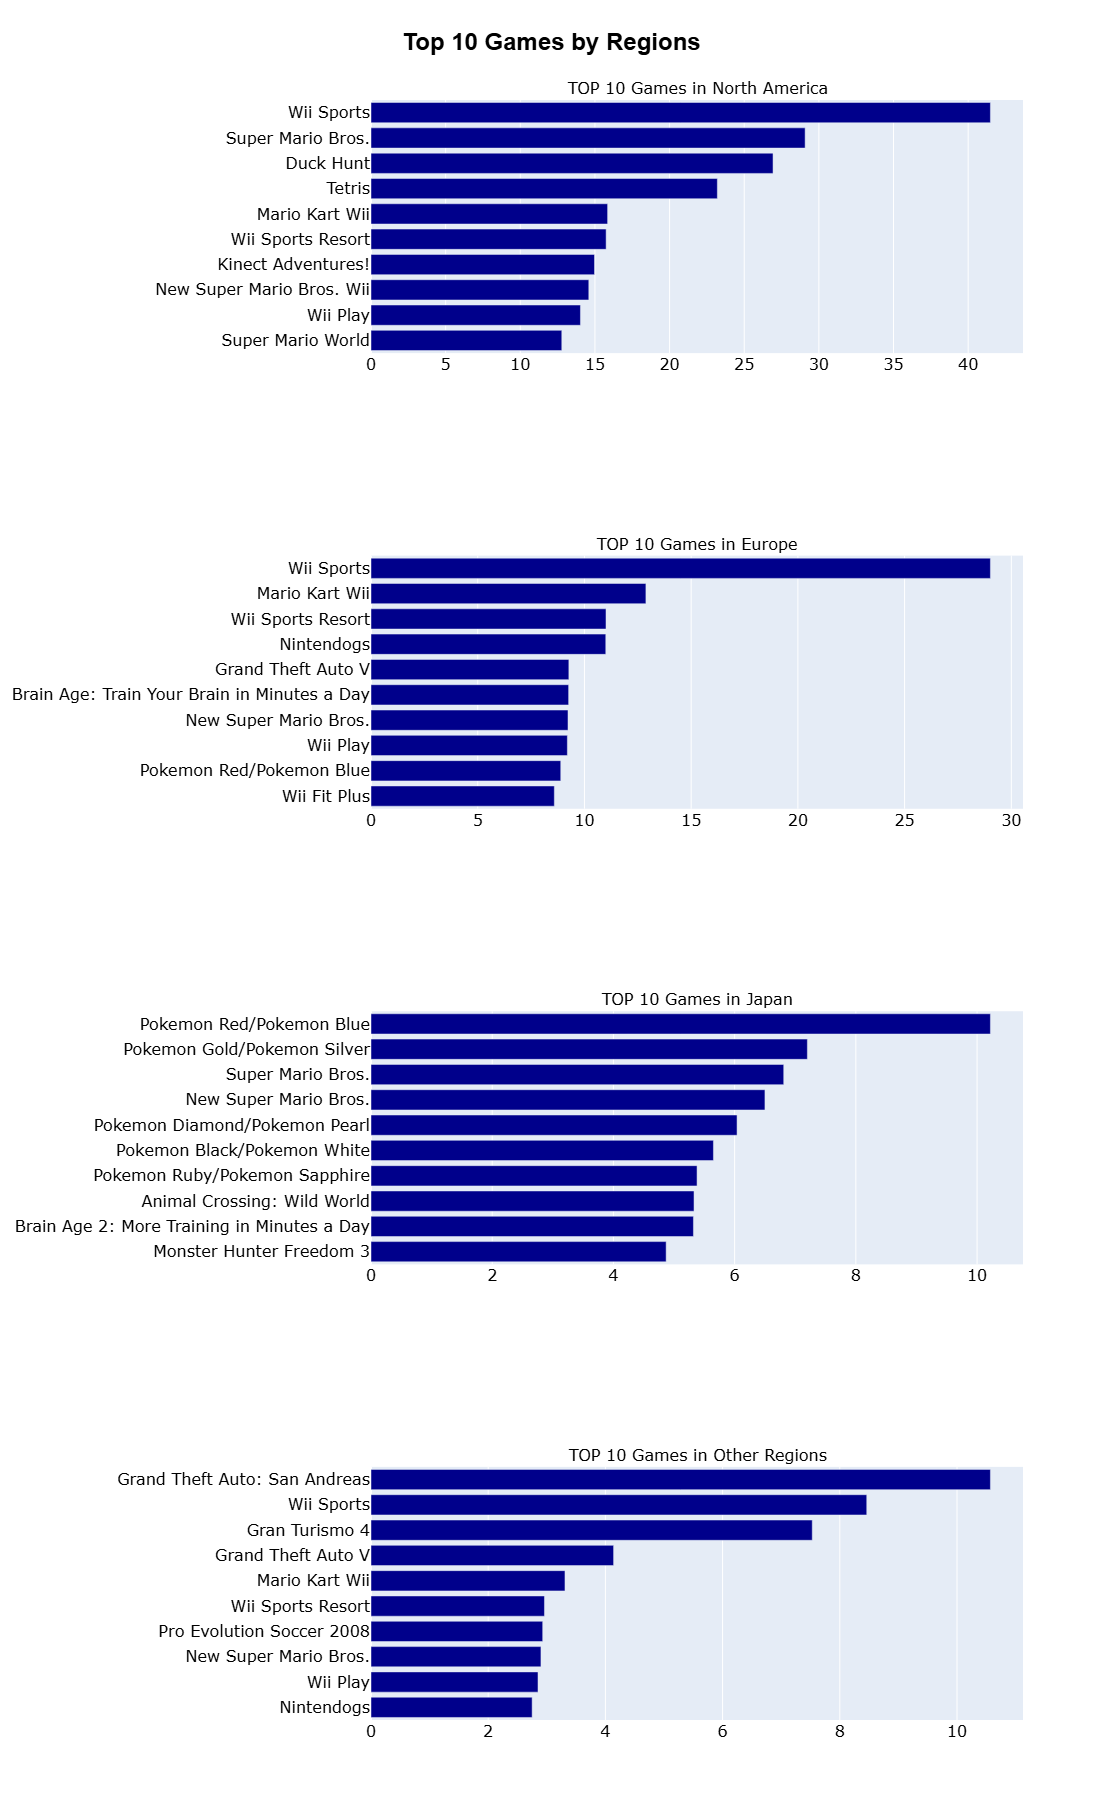

In [33]:
# Create dataframe of top sales of each region
top_na=df[['Name','NA_Sales']].nlargest(10,'NA_Sales').sort_values('NA_Sales')
top_eu=df[['Name','EU_Sales']].nlargest(10,'EU_Sales').sort_values('EU_Sales')
top_jp=df[['Name','JP_Sales']].nlargest(10,'JP_Sales').sort_values('JP_Sales')
top_or=df[['Name','Other_Sales']].nlargest(10,'Other_Sales').sort_values('Other_Sales')

# Create multiple charts

na_bar=px.bar(top_na,x='NA_Sales',y='Name',orientation='h',color_discrete_sequence=['darkblue'])
eu_bar=px.bar(top_eu,x='EU_Sales',y='Name',orientation='h',color_discrete_sequence=['darkblue'])
jp_bar=px.bar(top_jp,x='JP_Sales',y='Name',orientation='h',color_discrete_sequence=['darkblue'])
or_bar=px.bar(top_or,x='Other_Sales',y='Name',orientation='h',color_discrete_sequence=['darkblue'])

# Arrange subplot

fig=make_subplots(
    rows=4,cols=1,
    subplot_titles=('TOP 10 Games in North America','TOP 10 Games in Europe',
                   'TOP 10 Games in Japan','TOP 10 Games in Other Regions')
)

fig.add_trace(na_bar.data[0],row=1,col=1)
fig.add_trace(eu_bar.data[0],row=2,col=1)
fig.add_trace(jp_bar.data[0],row=3,col=1)
fig.add_trace(or_bar.data[0],row=4,col=1)

fig.update_layout(height=1800, width=1100, title_text="Top 10 Games by Regions",
                  title_x=0.5,title_font=dict(family="Arial, sans-serif",size=24,weight='bold',color='black'),
                 xaxis_title_font=dict(family='Verdana', size=18, color='black'),
                 yaxis_title_font=dict(family='Verdana', size=18, color='black'),
                 font=dict(family='Verdana', size=16, color='black'))


fig.show()


# Top 15 Publishers

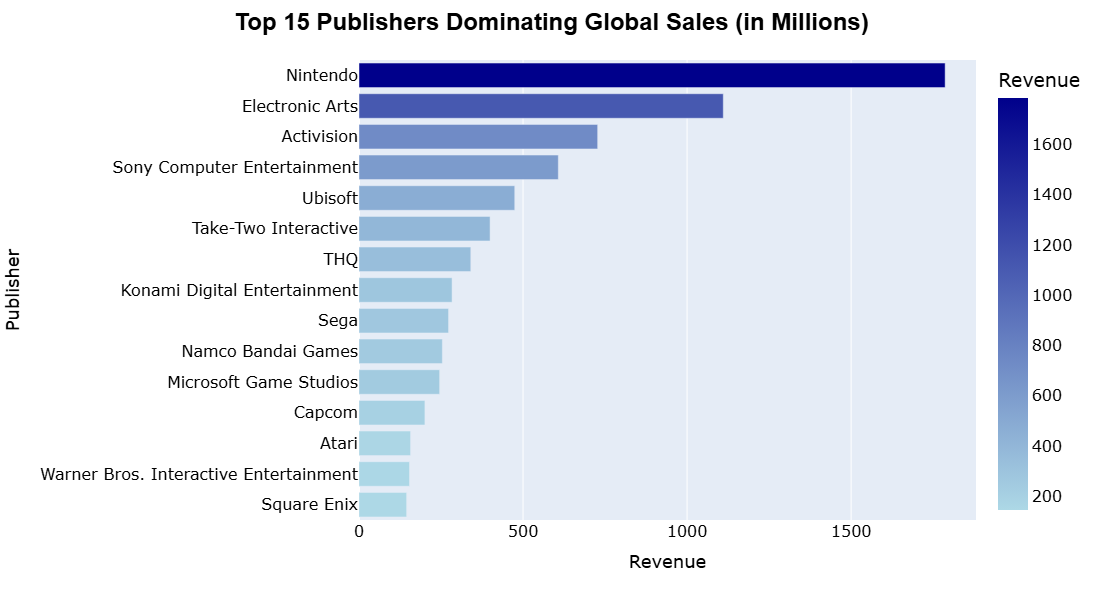

In [34]:
# Create dataframe of top publisher 

top_publisher_df=df.groupby('Publisher')['Global_Sales'].sum().reset_index(name='Revenue').nlargest(15,'Revenue').sort_values('Revenue')

# Create bar chart

fig=px.bar(top_publisher_df,x='Revenue',y='Publisher',color='Revenue',color_continuous_scale=[[0,'lightblue'],[1,'darkblue']])

fig.update_layout(height=600,title_text="Top 15 Publishers Dominating Global Sales (in Millions)",
                  title_x=0.5,title_font=dict(family="Arial, sans-serif",size=24,weight='bold',color='black'),
                 xaxis_title_font=dict(family='Verdana', size=18, color='black'),
                 yaxis_title_font=dict(family='Verdana', size=18, color='black'),
                 font=dict(family='Verdana', size=16, color='black'))

fig.show()

# Game Launches by Platforms

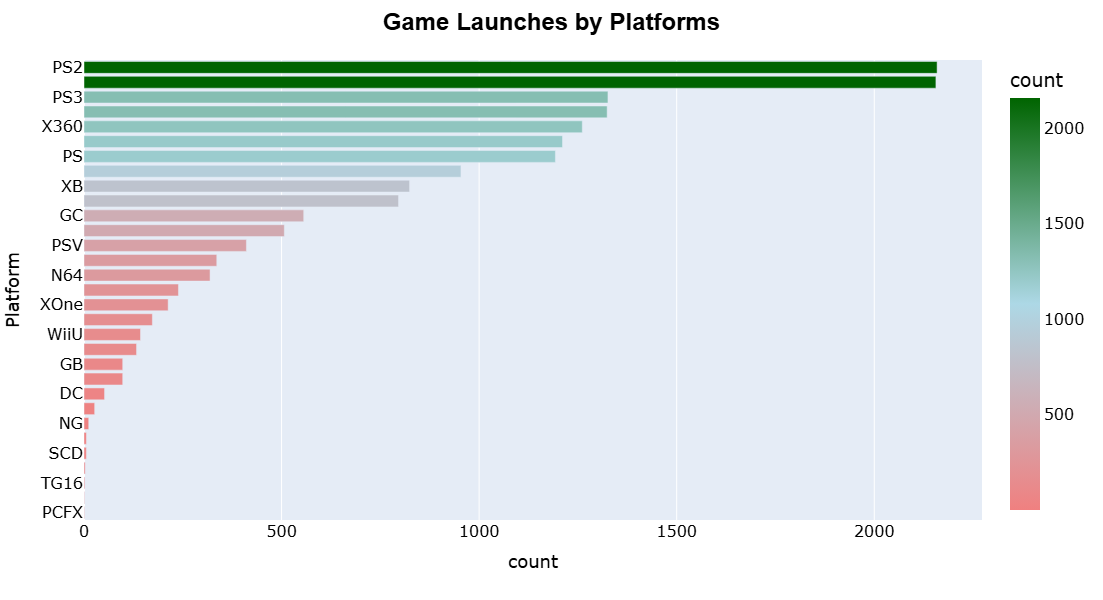

In [35]:
# Create dataframe of Platform frequency

platform_freq=df['Platform'].value_counts().reset_index().sort_values('count')

# Create Bar chart of platform frequency

fig=px.bar(platform_freq,x='count',y='Platform',orientation='h',color='count',
          color_continuous_scale=[[0,'lightcoral'],[0.5,'lightblue'],[1,'darkgreen']])

fig.update_layout(height=600, title_text="Game Launches by Platforms",
                  title_x=0.5,title_font=dict(family="Arial, sans-serif",size=24,weight='bold',color='black'),
                 xaxis_title_font=dict(family='Verdana', size=18, color='black'),
                 yaxis_title_font=dict(family='Verdana', size=18, color='black'),
                 font=dict(family='Verdana', size=16, color='black'))


fig.show()


# Revenue Generated by Platforms

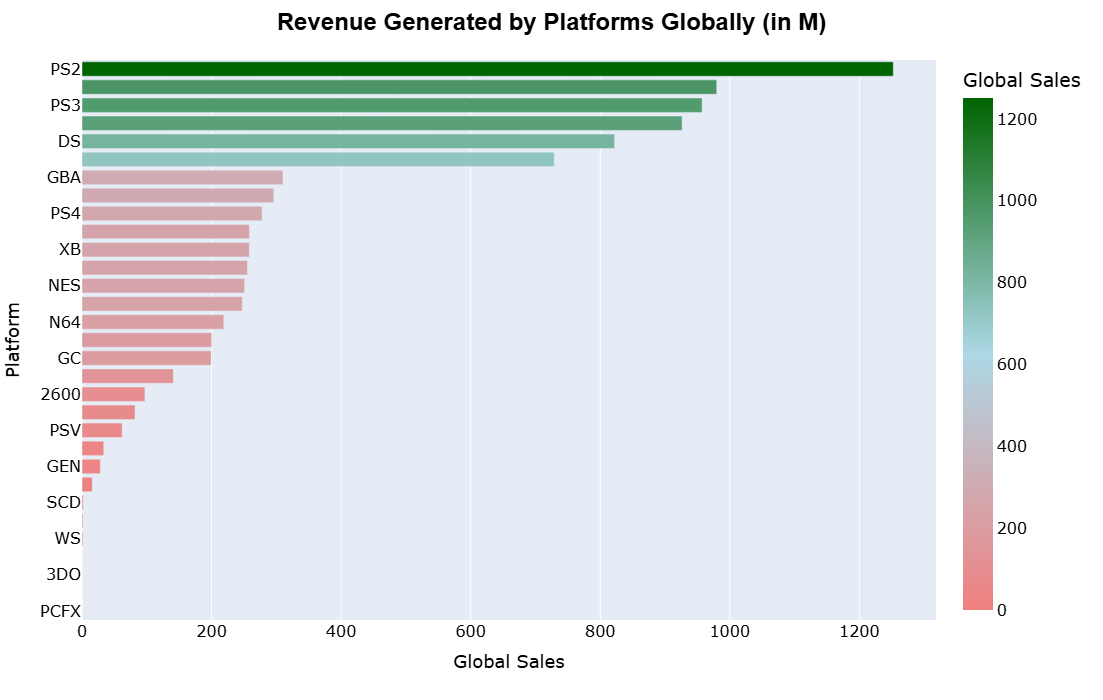

In [36]:
# Create aggregated dataframe of platform sales

platform_sales=df.groupby('Platform')['Global_Sales'].sum().reset_index(name='Global Sales').sort_values('Global Sales')

#Create Bar chart

fig=px.bar(platform_sales,x='Global Sales',y='Platform',orientation='h',color='Global Sales',
          color_continuous_scale=[[0,'lightcoral'],[0.5,'lightblue'],[1,'darkgreen']])

fig.update_layout(height=700, title_text="Revenue Generated by Platforms Globally (in M)",
                  title_x=0.5,title_font=dict(family="Arial, sans-serif",size=24,weight='bold',color='black'),
                 xaxis_title_font=dict(family='Verdana', size=18, color='black'),
                 yaxis_title_font=dict(family='Verdana', size=18, color='black'),
                 font=dict(family='Verdana', size=16, color='black'))

fig.show()

# Games Launched by Category

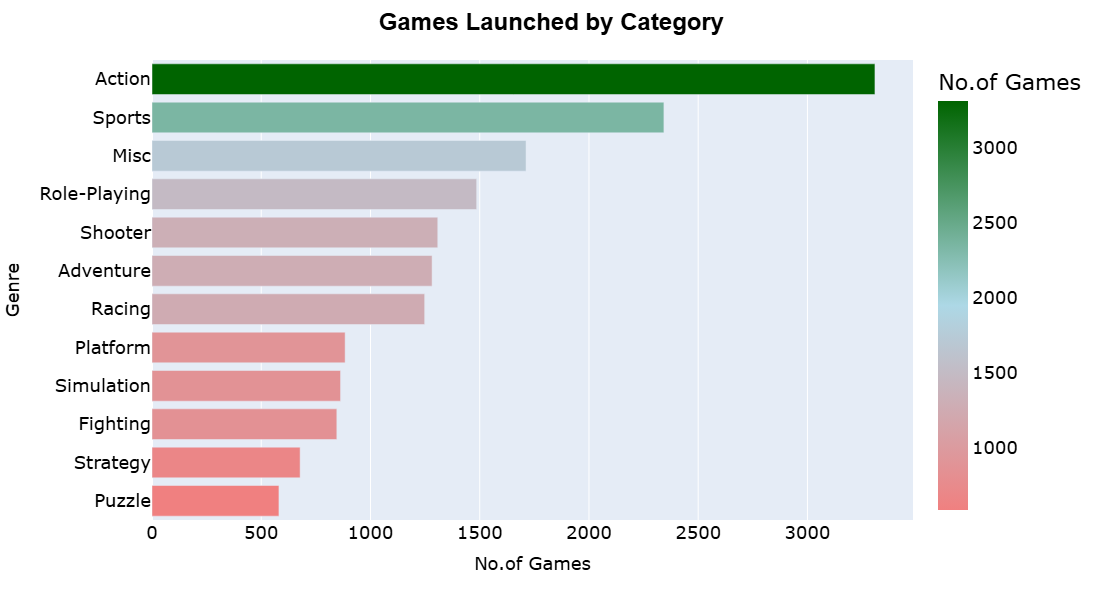

In [37]:
# Create dataframe of Genre Frequency

genre_freq=df['Genre'].value_counts().reset_index(name='count').sort_values('count')

# Create Bar chart

fig=px.bar(genre_freq,x='count',y='Genre',height=500,color='count',
          color_continuous_scale=[[0,'lightcoral'],[0.5,'lightblue'],[1,'darkgreen']],
          orientation='h',labels={'count':'No.of Games'})

fig.update_layout(height=600, title_text="Games Launched by Category",
                  title_x=0.5,title_font=dict(family="Arial, sans-serif",size=24,weight='bold',color='black'),
                 xaxis_title_font=dict(family='Verdana', size=18, color='black'),
                 yaxis_title_font=dict(family='Verdana', size=18, color='black'),
                 font=dict(family='Verdana', size=18, color='black'))

fig.show()

# Revenue Generated by Category

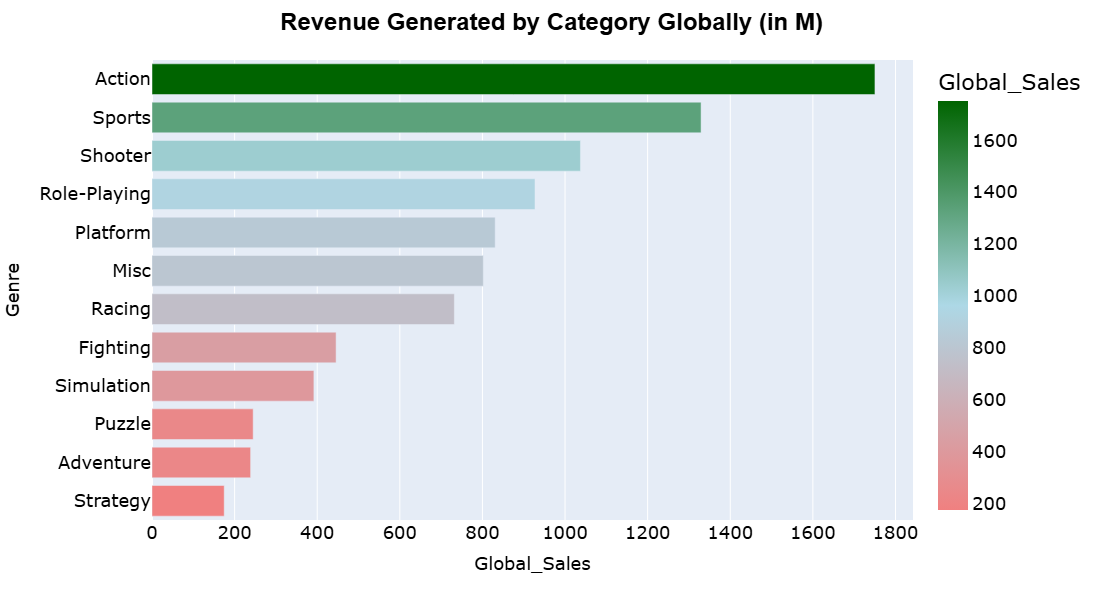

In [38]:
# Create dataframe of aggregated Genre with Global Sales

genre_df=df.groupby('Genre')['Global_Sales'].sum().reset_index(name='Global_Sales').sort_values('Global_Sales')

# Create Bar chart

fig=px.bar(genre_df,x='Global_Sales',y='Genre',orientation='h',color='Global_Sales',
          color_continuous_scale=[[0,'lightcoral'],[0.5,'lightblue'],[1,'darkgreen']])

fig.update_layout(height=600, title_text="Revenue Generated by Category Globally (in M)",
                  title_x=0.5,title_font=dict(family="Arial, sans-serif",size=24,weight='bold',color='black'),
                 xaxis_title_font=dict(family='Verdana', size=18, color='black'),
                 yaxis_title_font=dict(family='Verdana', size=18, color='black'),
                 font=dict(family='Verdana', size=18, color='black'))

fig.show()

# TOP 20 Games

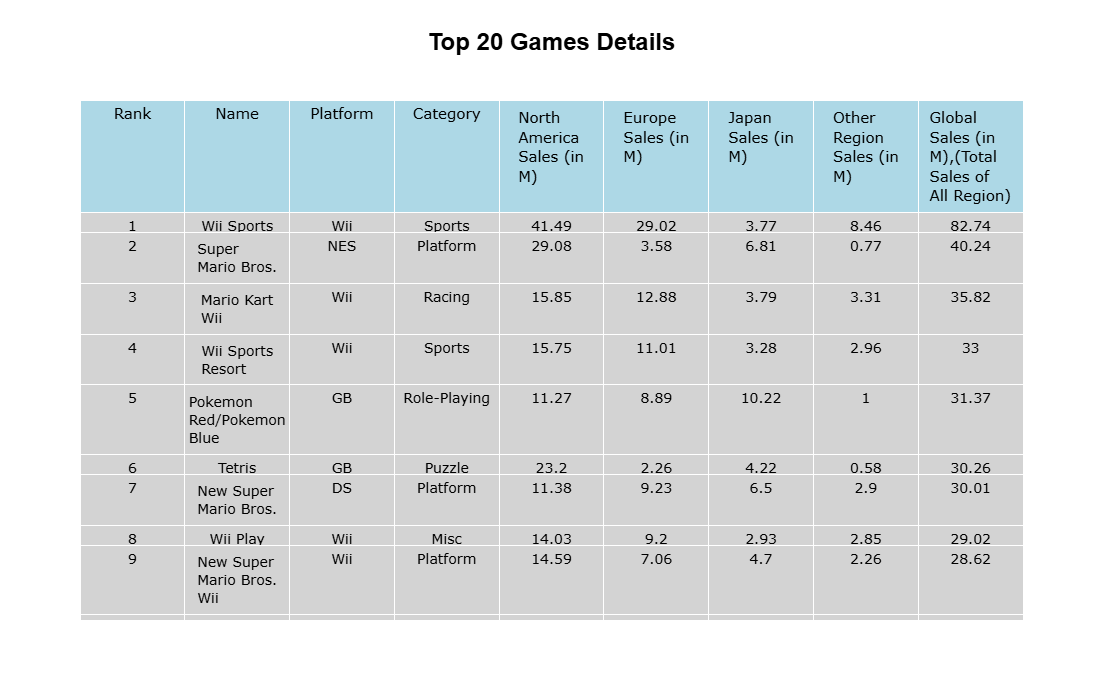

In [39]:
# Create dataframe of Top 20 dataframe of games 

top_df=df.nlargest(20,'Global_Sales')

# Create Matrix table

fig= go.Figure(
    data=[
        go.Table(
            header=dict(
                values=[
                    "Rank",
                    "Name",
                    "Platform",
                    "Category",
                    "North America Sales (in M)",
                    "Europe Sales (in M)",
                    "Japan Sales (in M)",
                    "Other Region Sales (in M)",
                    "Global Sales (in M),(Total Sales of All Region)",
                ],
                fill_color="lightblue",
                align="center",
                font=dict(size=15, color="black"),
            ),
            cells=dict(
                values=[
                    top_df["Rank"],
                    top_df["Name"],
                    top_df["Platform"],
                    top_df["Genre"],
                    top_df["NA_Sales"],
                    top_df["EU_Sales"],
                    top_df["JP_Sales"],
                    top_df["Other_Sales"],
                    top_df["Global_Sales"],
                ],
                fill_color="lightgray",
                align="center",
                font=dict(size=14,color='black'),
            ),
        )
    ]
)

fig.update_layout(height=700,title="Top 20 Games Details",title_x=0.5,
                 title_font=dict(family="Arial, sans-serif",size=24,weight='bold',color='black'))

# Show the table
fig.show()

# Lowest 20 Games

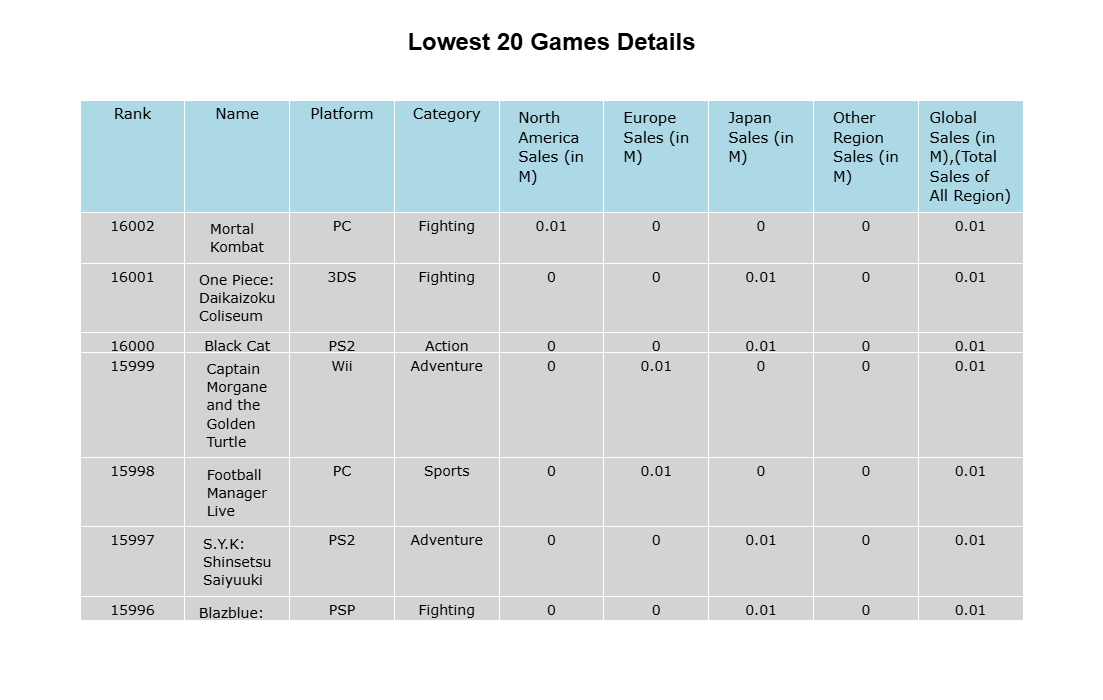

In [40]:
# Create dataframe of Lowest 20 dataframe of games

bottom_df=df.nsmallest(20,'Global_Sales').sort_values('Rank',ascending=False)

# Create Matrix table

fig= go.Figure(
    data=[
        go.Table(
            header=dict(
                values=[
                    "Rank",
                    "Name",
                    "Platform",
                    "Category",
                    "North America Sales (in M)",
                    "Europe Sales (in M)",
                    "Japan Sales (in M)",
                    "Other Region Sales (in M)",
                    "Global Sales (in M),(Total Sales of All Region)",
                ],
                fill_color="lightblue",
                align="center",
                font=dict(size=15, color="black"),
            ),
            cells=dict(
                values=[
                    bottom_df["Rank"],
                    bottom_df["Name"],
                    bottom_df["Platform"],
                    bottom_df["Genre"],
                    bottom_df["NA_Sales"],
                    bottom_df["EU_Sales"],
                    bottom_df["JP_Sales"],
                    bottom_df["Other_Sales"],
                    bottom_df["Global_Sales"],
                ],
                fill_color="lightgray",
                align="center",
                font=dict(size=14,color='black'),
            ),
        )
    ]
)

fig.update_layout(height=700,title="Lowest 20 Games Details",title_x=0.5,
                 title_font=dict(family="Arial, sans-serif",size=24,weight='bold',color='black'))

# Show the table
fig.show()

# Export Dataset

In [132]:
df.to_csv('cleaned_vgsales.csv')